<a href="https://colab.research.google.com/github/dssunidhi/LeadScore/blob/main/HousePredication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Step-1###
##Importing necessary packages##

In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For working with data frames
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.metrics import r2_score  # For evaluating model performance

###Step-2###
##import dataset##

In [ ]:
data=pd.read_csv("House.csv")
data
#Check Null Values Present in Dataset
data.isnull().sum()
#Drop Unneccessary columns
data.drop(['sqft_above'],axis='columns',inplace=True)
data
#convert date values in 0,1 format
conv_date=[1 if values==2014 else 0 for values in data.date ]
data['date']=conv_date
#dispaly top 5 records in dataset
data.head()
#display information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   int64  
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 611

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,0,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


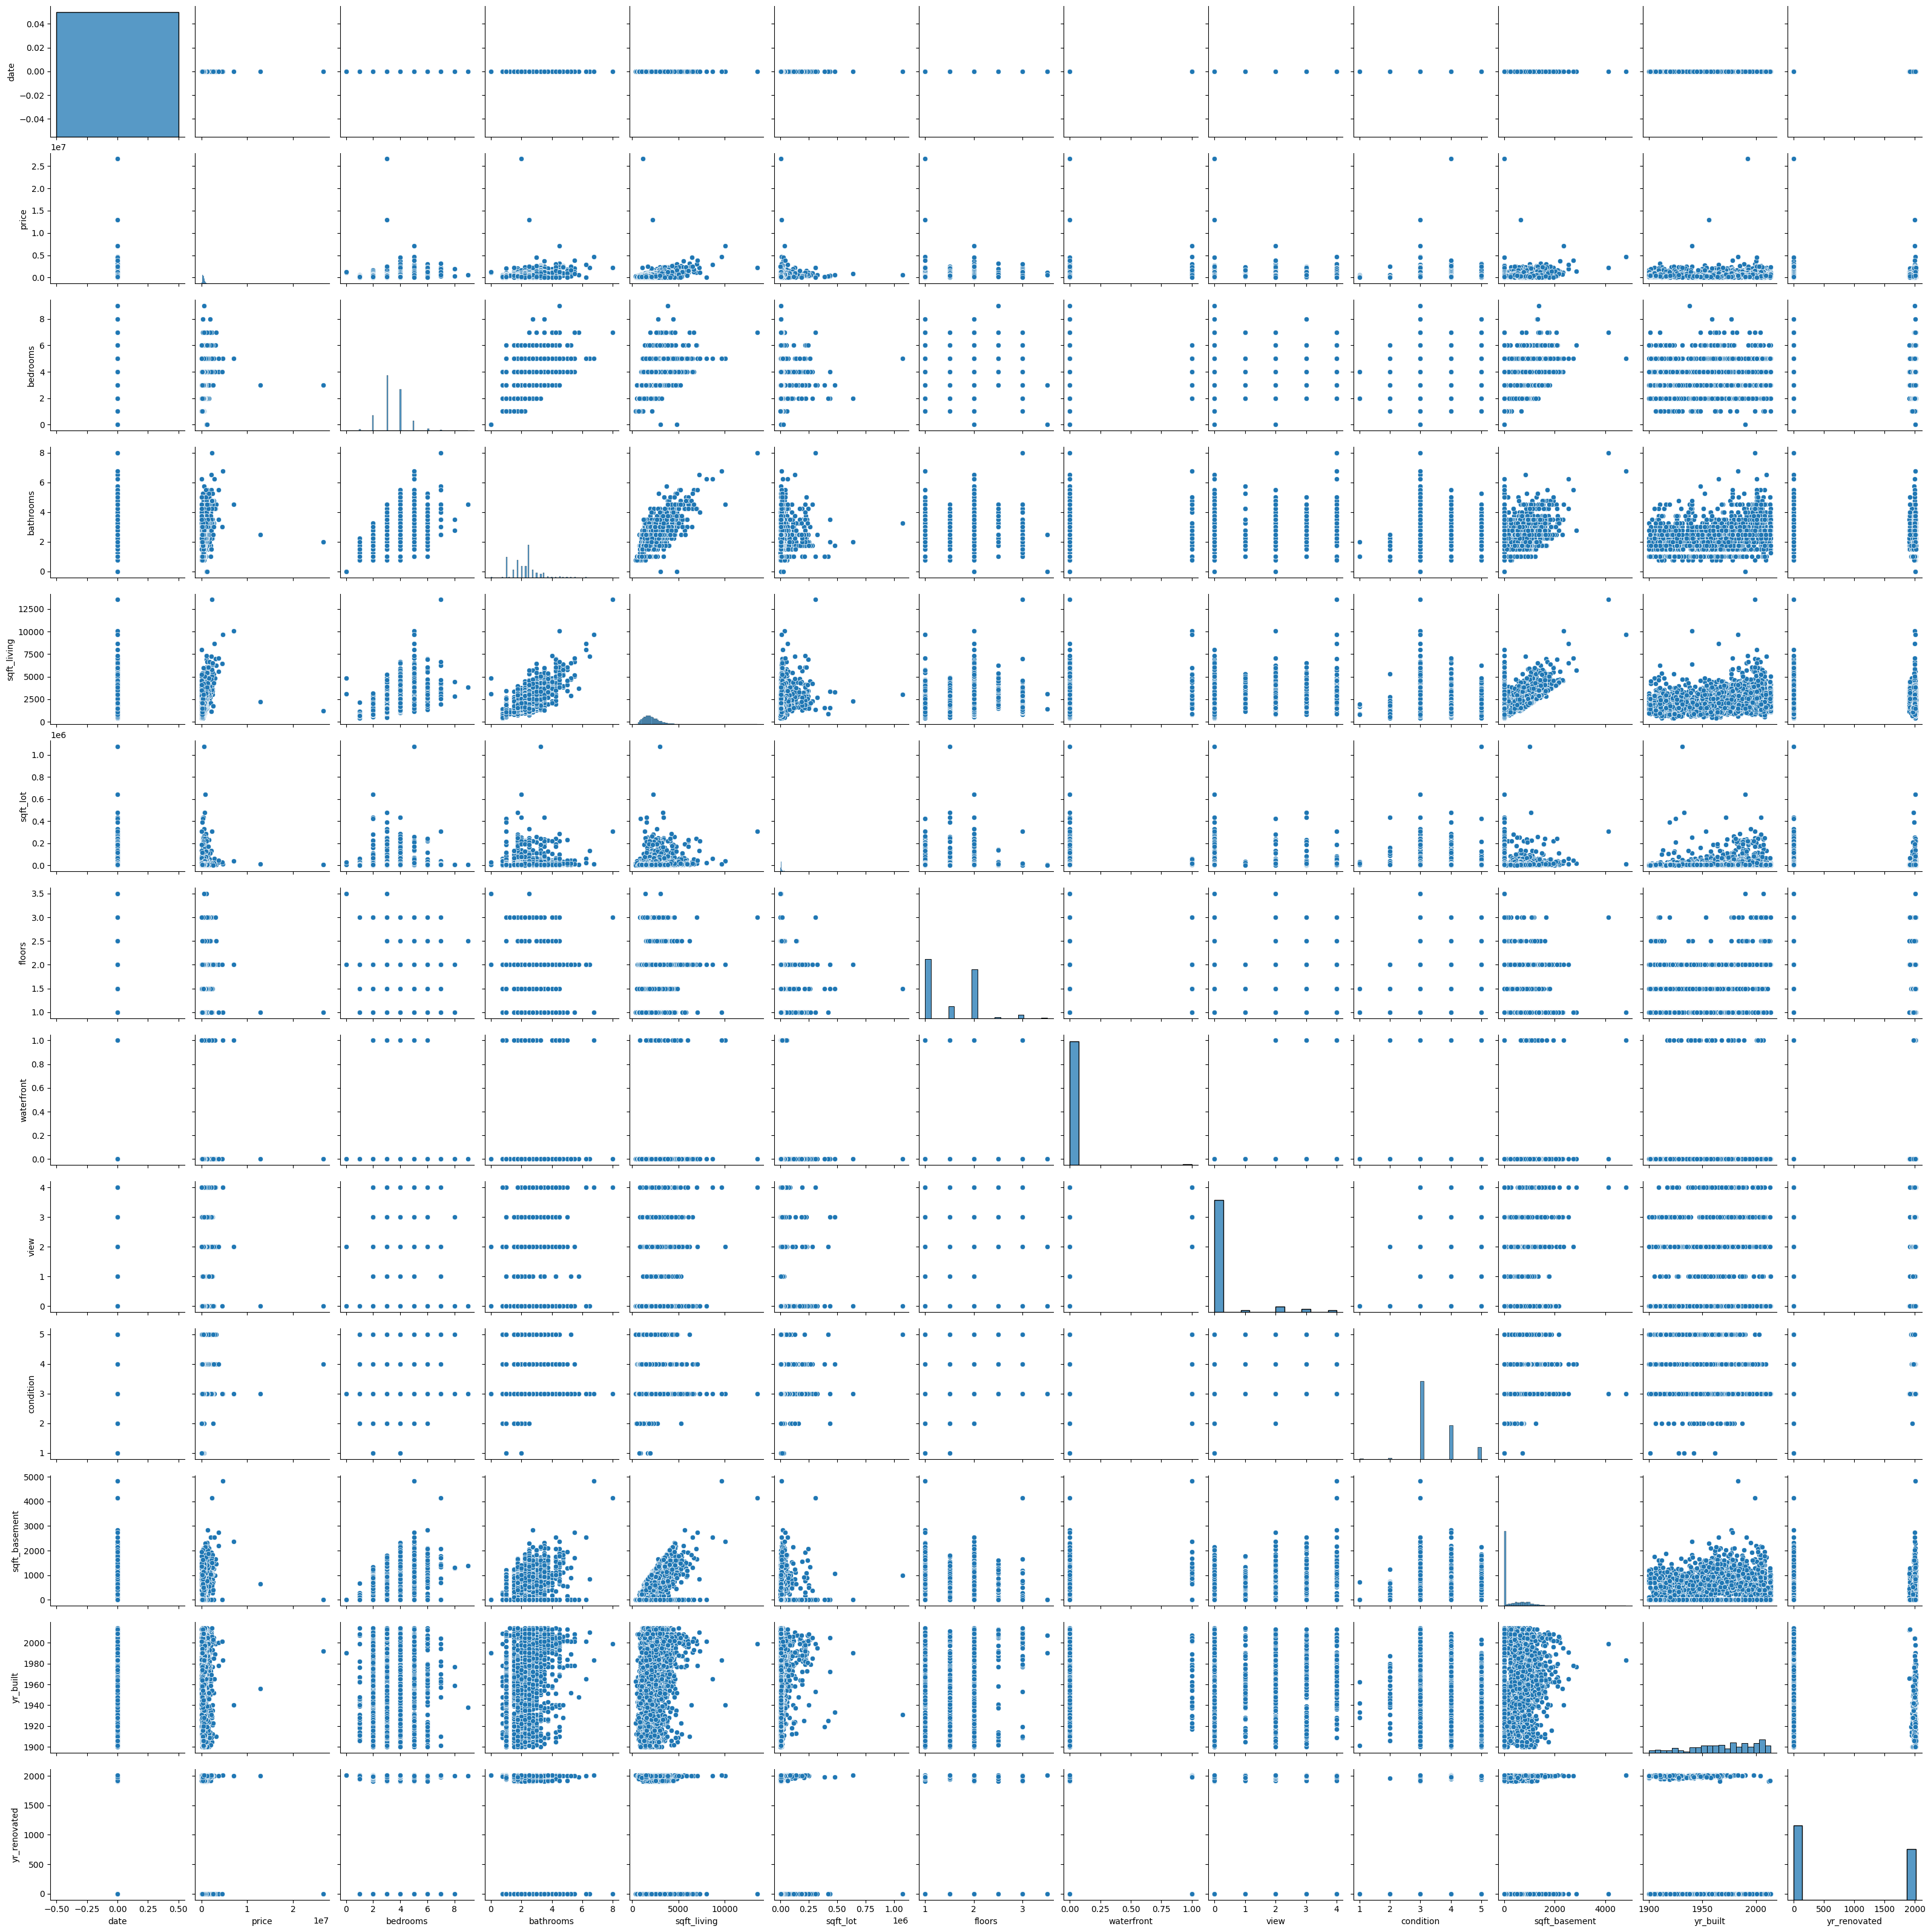

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data=data.drop(['street'],axis=1)


In [ ]:
data=data.drop(['city'],axis=1)


In [ ]:
data=data.drop(['statezip'],axis=1)

In [ ]:
data=data.drop(['country'],axis=1)

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005
1,0,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importing matplotlib's pyplot module

# Assuming 'data' is your DataFrame
sns.pairplot(data)
plt.show()


NameError: name 'data' is not defined

###Step-3###
###Data Conversion###
convert string data to numercial data bcoz machine lerning only understand numrecial data

In [ ]:
# Convert qualitative predictors to the 'category' data type
categorical_columns = data.select_dtypes(include = 'object').columns
data[categorical_columns] = data[categorical_columns].astype('numeric')

In [ ]:
# Store the categorical column names
categorical_columns = data.select_dtypes(include = 'category').columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           4600 non-null   int64   
 1   price          4600 non-null   float64 
 2   bedrooms       4600 non-null   float64 
 3   bathrooms      4600 non-null   float64 
 4   sqft_living    4600 non-null   int64   
 5   sqft_lot       4600 non-null   int64   
 6   floors         4600 non-null   float64 
 7   waterfront     4600 non-null   int64   
 8   view           4600 non-null   int64   
 9   condition      4600 non-null   int64   
 10  sqft_basement  4600 non-null   int64   
 11  yr_built       4600 non-null   int64   
 12  yr_renovated   4600 non-null   int64   
 13  street         4600 non-null   category
 14  city           4600 non-null   category
 15  statezip       4600 non-null   category
 16  country        4600 non-null   category
dtypes: category(4), float64(4), int64

###Step-4###
###identify dependent (x) varible and independent varible(y)
split dataset into subparts like dependent and independent sepreately store in x and y

In [ ]:
y = data[['price']].values
x = data.drop(['price'], axis=1).values

In [ ]:
y = pd.DataFrame(y, columns=['price'])

# Convert x to DataFrame
x= pd.DataFrame(x, columns=data.columns.drop('price'))

###Step-5###
###Split data into train data and test data###

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 0)
x_train,x_test,y_train,y_test


(     date bedrooms bathrooms sqft_living sqft_lot floors waterfront view  \
 1144    0      2.0       1.0         800     3330    1.0          0    0   
 36      0      2.0       1.0         800     4850    1.0          0    0   
 706     0      4.0       2.5        2240    12032    1.0          0    0   
 1559    0      3.0       1.0        1250     6250    1.0          0    0   
 1349    0      4.0       2.0        2330     6250    1.0          0    0   
 ...   ...      ...       ...         ...      ...    ...        ...  ...   
 1033    0      3.0       1.5        1270     1443    3.0          0    0   
 3264    0      2.0       1.0         970     5500    1.0          0    0   
 1653    0      5.0      2.75        2080    13189    2.0          0    0   
 2607    0      4.0       2.5        3070    34412    1.0          0    3   
 2732    0      3.0      1.75        1700     8432    1.0          0    0   
 
      condition sqft_basement yr_built yr_renovated  \
 1144         3    

In [ ]:
x.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,3.0,1.5,1340,7912,1.5,0,0,3,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,0,5.0,2.5,3650,9050,2.0,0,4,5,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,0,3.0,2.0,1930,11947,1.0,0,0,4,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,0,4.0,2.5,1940,10500,1.0,0,0,4,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
x.drop(['street'],axis=1,inplace=True)


In [ ]:
x.drop(['city'],axis=1,inplace=True)


KeyError: "['city'] not found in axis"

In [ ]:
x.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip,country
0,0,3.0,1.5,1340,7912,1.5,0,0,3,0,1955,2005,WA 98133,USA
1,0,5.0,2.5,3650,9050,2.0,0,4,5,280,1921,0,WA 98119,USA
2,0,3.0,2.0,1930,11947,1.0,0,0,4,0,1966,0,WA 98042,USA
3,0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,WA 98008,USA
4,0,4.0,2.5,1940,10500,1.0,0,0,4,800,1976,1992,WA 98052,USA


In [ ]:
x.drop(['statezip'],axis=1,inplace=True)

x.drop(['country'],axis=1,inplace=True)



In [ ]:
x.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,0,3.0,1.5,1340,7912,1.5,0,0,3,0,1955,2005
1,0,5.0,2.5,3650,9050,2.0,0,4,5,280,1921,0
2,0,3.0,2.0,1930,11947,1.0,0,0,4,0,1966,0
3,0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0
4,0,4.0,2.5,1940,10500,1.0,0,0,4,800,1976,1992


In [ ]:
print(x.dtypes)
print(y.dtypes)

date             object
bedrooms         object
bathrooms        object
sqft_living      object
sqft_lot         object
floors           object
waterfront       object
view             object
condition        object
sqft_basement    object
yr_built         object
yr_renovated     object
dtype: object
price    float64
dtype: object


In [ ]:
# Convert the 'date' column in x to a datetime object
x['date'] = pd.to_datetime(x['date'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
# Convert the 'date' column in x to a datetime object
x['bedrooms'] = pd.to_datetime(x['bedrooms'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
# Convert the 'date' column in x to a datetime object
x['sqft_living'] = pd.to_datetime(x['sqft_living'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
# Convert the 'date' column in x to a datetime object
x['sqft_lot'] = pd.to_datetime(x['sqft_lot'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
# Convert the 'date' column in x to a datetime object
x['floors'] = pd.to_datetime(x['floors'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
# Convert the 'date' column in x to a datetime object
x['waterfront'] = pd.to_datetime(x['waterfront'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
# Convert the 'date' column in x to a datetime object
x['view'] = pd.to_datetime(x['view'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
# Convert the 'date' column in x to a datetime object
x['condition'] = pd.to_datetime(x['condition'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
# Convert the 'date' column in x to a datetime object
x['sqft_basement'] = pd.to_datetime(x['sqft_basement'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
# Convert the 'date' column in x to a datetime object
x['yr_built'] = pd.to_datetime(x['yr_built'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
# Convert the 'date' column in x to a datetime object
x['yr_renovated'] = pd.to_datetime(x['yr_renovated'])

# Ensure that all columns in x are numeric
x = x.apply(pd.to_numeric)

# Ensure that y is a numeric column
y = y.apply(pd.to_numeric)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 0)
x_train,x_test,y_train,y_test


(      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
 1144     0         2          1          800      3330       1           0   
 36       0         2          1          800      4850       1           0   
 706      0         4          2         2240     12032       1           0   
 1559     0         3          1         1250      6250       1           0   
 1349     0         4          2         2330      6250       1           0   
 ...    ...       ...        ...          ...       ...     ...         ...   
 1033     0         3          1         1270      1443       3           0   
 3264     0         2          1          970      5500       1           0   
 1653     0         5          2         2080     13189       2           0   
 2607     0         4          2         3070     34412       1           0   
 2732     0         3          1         1700      8432       1           0   
 
       view  condition  sqft_basement  yr_built  y

###Step-6###
###define and train linear regression model using training data###

In [ ]:
#define linear regression
LR=LinearRegression()
#train linera regression model using x and y varible i.e indepebdent and dependent varibles
LR.fit(x_train,y_train)

LinearRegression()

###Step-7###
###test data###

In [ ]:
y_predict=LR.predict(x_test)
print(y_predict)
print(y_test)

[[ 502403.33170073]
 [ 627233.18764754]
 [ 263550.96164411]
 [ 601859.7962692 ]
 [ 756784.18824151]
 [ 298210.13491897]
 [ 582434.14562781]
 [ 610797.41224214]
 [ 330010.20865522]
 [1342932.61359834]
 [ 597517.97420523]
 [ 441897.32640461]
 [1057715.86782934]
 [ 535456.26659492]
 [ 597438.72192469]
 [ 302508.20375621]
 [ 368895.59227125]
 [ 486457.94022111]
 [ 953961.71991108]
 [ 363200.4827298 ]
 [ 409786.82879871]
 [ 893618.35578699]
 [ 385016.77787757]
 [ 406901.60288964]
 [ 737024.10296246]
 [ 422677.99443803]
 [ 647857.57906423]
 [ 606136.65192808]
 [ 290181.49511917]
 [ 615126.63035594]
 [ 749295.4905114 ]
 [ 482899.17534798]
 [ 501813.30180925]
 [ 555087.90151025]
 [ 364298.96615961]
 [ 475657.63404572]
 [ 342413.35234656]
 [ 440354.17164088]
 [ 425881.91045743]
 [ 592713.12704749]
 [ 588189.97905377]
 [ 431823.85536686]
 [ 520852.56518921]
 [ 795082.45510698]
 [ 419262.07620494]
 [ 612305.19751192]
 [ 771572.28794946]
 [ 912452.09084774]
 [ 546866.63728191]
 [ 582546.66077156]


###Step-7###
###determine the performance of model using suitable metric###
calculate model performance

In [ ]:
print('coefficient of determination:%.3f' % r2_score(y_test,y_predict))

coefficient of determination:0.550


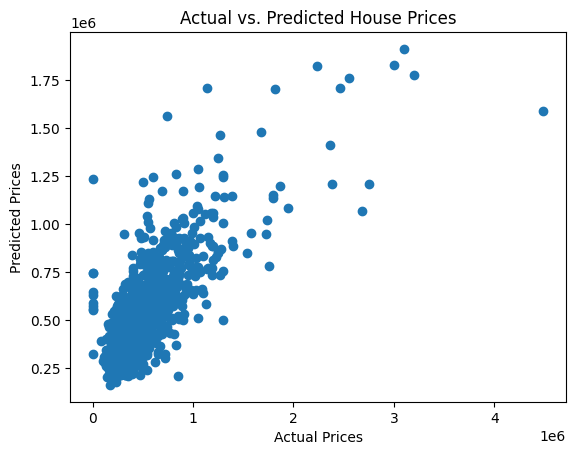

In [ ]:
# Plot predicted vs. actual values
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()